In [ ]:
# In the book code along

# from scratch
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])


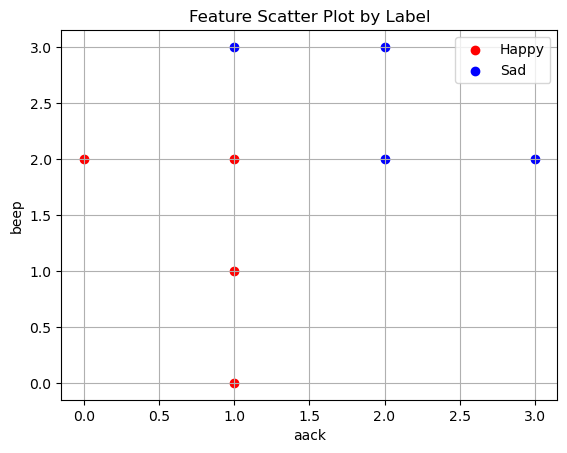

In [5]:
import matplotlib.pyplot as plt

# Plot points with label 0
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], color='red', label='Happy')
# Plot points with label 1
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], color='blue', label='Sad')

plt.xlabel('aack')
plt.ylabel('beep')
plt.title('Feature Scatter Plot by Label')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# codinf the percepron trick
# we use stochastic graident descent, but we could use mini-batch or batch gradient descent
def score(weights, bias, features):
    return np.dot(features, weights) + bias

In [7]:
# predicition function, but first write the step function
def step(x):
    if x >= 0:
        return 1
    else:
        return 0
    

# looks at the score, and if it is positive or zero, returns 1, if negative, returns 0
def prediction(weights, bias, features):
    return step(score(weights, bias, features))

In [9]:
# error function
def error(weights, bias, features, label):
    pred = prediction(weights, bias, features) 
    if pred == label: # if predicrtion is equal to the label, then the point is well classified, which means error is zero
        return 0
    else: # if pred is diff from the label, then point is misclassified, which means the error is uqual to the absolute value of the scor
        return np.abs(score(weights, bias, features))

In [10]:
# calcs average of the errors of all the points in our dataset
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)): # loops through data, and for each point, adds the error at that point, then returns this error
        total_error += error(weights, bias, features[i], labels[i])
    return total_error /len(features)


In [12]:
# here is the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate # updates the weights and biases using the trick
    bias += (label-pred)*learning_rate
    return weights, bias

In [14]:
# now the algorithm where we start with a random perceptron classifier and repeating the perceptron trick many times. Totrack performance, we will kepp track of the mean perceptron error at each epoch
import random
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))] # initializes the wights to 1 and the bias to 0, but we oculd also do small random numbers too
    bias = 0.0
    errors = []
    for epoch in range(epochs): # repeat proces as many times as the descubed num of epochs
        error = mean_perceptron_error(weights, bias, features, labels) #calcs the mean perceptron error and stores it
        errors.append(error)
        i = random.randint(0, len(features)-1) # picks a random point in our dataset
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i]) # applies the perceptron algo to update the weights and bias of outr model based on that point
    return weights, bias, errors

Final weights: [0.4599999999999995, 0.09999999999999934]
Final bias: -0.6900000000000004


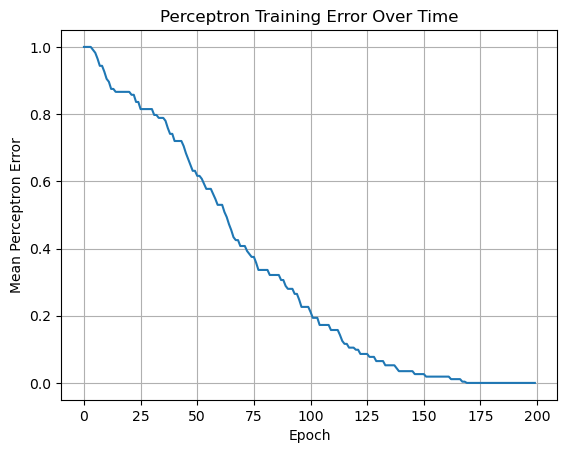

In [18]:
# lets run our algorithm now!
# Run the perceptron algorithm
weights, bias, errors = perceptron_algorithm(features, labels, learning_rate=0.01, epochs=200)

print("Final weights:", weights)
print("Final bias:", bias)

# Optionally, plot the error over epochs to see how it decreases
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Perceptron Error')
plt.title('Perceptron Training Error Over Time')
plt.grid(True)
plt.show()

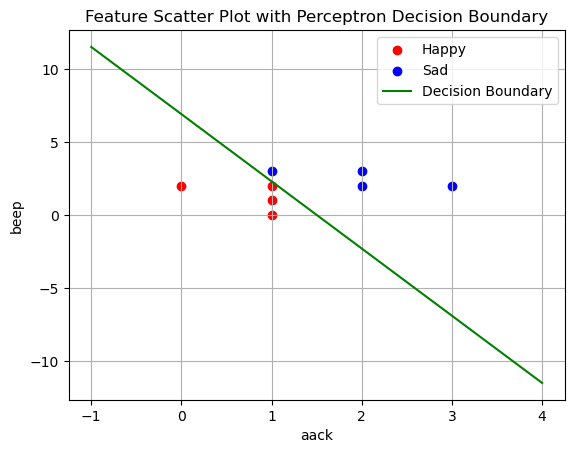

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], color='red', label='Happy')
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], color='blue', label='Sad')

# Plot the decision boundary
x_values = np.array([features[:, 0].min() - 1, features[:, 0].max() + 1])
# For a line: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
if weights[1] != 0:
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')
else:
    # Vertical line if w2 is zero
    plt.axvline(x=-bias/weights[0], color='green', label='Decision Boundary')

plt.xlabel('aack')
plt.ylabel('beep')
plt.title('Feature Scatter Plot with Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# here is the code using scikit learn

from sklearn.linear_model import Perceptron

# create and fir the model
clf = Perceptron(max_iter=200, eta0=0.01, random_state=42)
clf.fit(features, labels)

print("weights: ", clf.coef_)
print("Bias:", clf.intercept_)

weights:  [[0.01 0.02]]
Bias: [-0.05]


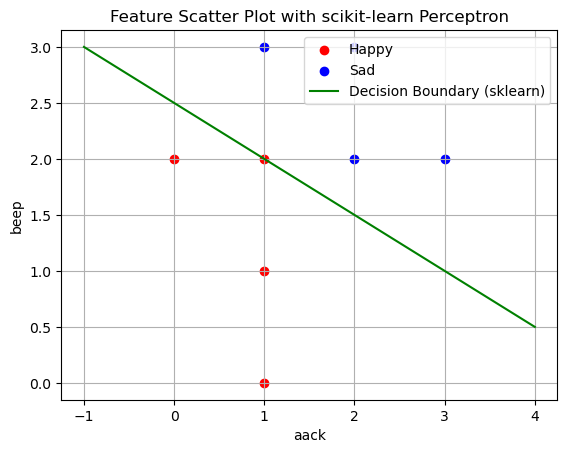

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], color='red', label='Happy')
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], color='blue', label='Sad')

# Plot the decision boundary
x_values = np.array([features[:, 0].min() - 1, features[:, 0].max() + 1])
w = clf.coef_[0]
b = clf.intercept_[0]
if w[1] != 0:
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary (sklearn)')
else:
    plt.axvline(x=-b/w[0], color='green', label='Decision Boundary (sklearn)')

plt.xlabel('aack')
plt.ylabel('beep')
plt.title('Feature Scatter Plot with scikit-learn Perceptron')
plt.legend()
plt.grid(True)
plt.show()